# Proyek Analisis Data: E-Commerce Public Datasets
- **Nama:** Muhammad Tsaqif
- **Email:** mtsaqif08@gmail.com
- **ID Dicoding:** MC004D5Y2062

## Pertanyaan Bisnis

- **Membuat Prediksi (Visual Tren)**
  > Bagaimana perubahan nilai rata-rata pembayaran pelanggan dari waktu ke waktu selama 12 bulan terakhir, dan adakah periode tertentu yang menunjukkan tren kenaikan atau penurunan signifikan?

- **Menemukan Hubungan**
  > Bagaimana hubungan antara harga produk dan biaya pengiriman dalam data pesanan?

## Import Library

In [1]:
#!pip install numpy pandas matplotlib seaborn scipy jinja2 ipython

import os
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
def get_filenames(folder_path):
    """
    Mengembalikan daftar semua nama file dalam folder yang diberikan.

    Args:
    folder_path (str): Lokasi folder yang berisi file.

    Returns:
    list: Daftar nama file yang ada di folder tersebut, hanya file (bukan direktori).
    
    Raises:
    FileNotFoundError: Jika folder tidak ditemukan.
    """
    try:
        return [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    except FileNotFoundError:
        print(f"Folder '{folder_path}' tidak ditemukan.")

def read_csv_datasets(file_list, folder_path="datasets"):
    """
    Membaca file CSV dari list nama file dan mengembalikannya dalam dictionary.

    Args:
    file_list (list): Daftar nama file yang akan dibaca.
    folder_path (str): Lokasi folder tempat file CSV disimpan (default "datasets").

    Returns:
    dict: Dictionary dengan nama file sebagai key dan dataframe sebagai value.
    """
    return {
        os.path.splitext(file)[0]: pd.read_csv(fp)
        for file in file_list if file.endswith(".csv") and os.path.isfile(fp := os.path.join(folder_path, file))
    }

class OutlierDetector:
    """
    Kelas untuk mendeteksi outlier dalam data menggunakan metode IQR dan Z-Score.

    Attributes:
    data (pd.DataFrame): DataFrame yang berisi data yang akan dianalisis.
    selected_columns (list): Daftar kolom yang ingin dianalisis. Jika None, semua kolom akan dianalisis.

    Methods:
    detect_iqr(): Deteksi outlier menggunakan Interquartile Range (IQR).
    detect_zscore(threshold=3): Deteksi outlier menggunakan Z-Score dengan ambang batas tertentu.
    plot_boxplot(): Menampilkan boxplot untuk kolom yang dipilih.
    """
    
    def __init__(self, data, selected_columns=None):
        """
        Inisialisasi dengan data (Pandas DataFrame) dan kolom yang ingin dianalisis.

        Args:
        data (pd.DataFrame): DataFrame yang berisi data yang akan dianalisis.
        selected_columns (list, optional): Kolom yang ingin dianalisis. Default adalah semua kolom.
        
        Raises:
        TypeError: Jika data bukan merupakan Pandas DataFrame.
        """
        if not isinstance(data, pd.DataFrame):
            raise TypeError("Data harus berupa Pandas DataFrame")
        self.data = data
        self.selected_columns = selected_columns.tolist() if isinstance(selected_columns, pd.Index) else (selected_columns if selected_columns else data.columns.tolist())

    def detect_iqr(self):
        """
        Deteksi outlier menggunakan Interquartile Range (IQR) hanya untuk kolom yang dipilih.

        Returns:
        dict: Dictionary dengan nama kolom sebagai key dan nilai outlier sebagai value.
        """
        outliers = {}
        for col in self.selected_columns:
            Q1 = self.data[col].quantile(0.25)
            Q3 = self.data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = self.data[(self.data[col] < lower_bound) | (self.data[col] > upper_bound)][col]
        return outliers

    def detect_zscore(self, threshold=3):
        """
        Deteksi outlier menggunakan Z-Score hanya untuk kolom yang dipilih.

        Args:
        threshold (int, optional): Ambang batas Z-Score untuk mendeteksi outlier. Default adalah 3.

        Returns:
        dict: Dictionary dengan nama kolom sebagai key dan nilai outlier sebagai value.
        """
        outliers = {}
        for col in self.selected_columns:
            z_scores = np.abs(stats.zscore(self.data[col]))
            outliers[col] = self.data[z_scores > threshold][col]
        return outliers

    def plot_boxplot(self):
        """
        Menampilkan boxplot hanya untuk kolom yang dipilih.
        """
        num_cols = len(self.selected_columns)
        fig, axes = plt.subplots(1, num_cols, figsize=(6 * num_cols, 5))
        if num_cols == 1:
            axes = [axes]
        for ax, col in zip(axes, self.selected_columns):
            ax.boxplot(self.data[col], vert=False)
            ax.set_title(f"Boxplot - {col}")
            ax.set_xlabel("Value")
        plt.tight_layout()
        plt.show()

def check_missing_values(data):
    """
    Menghitung jumlah dan persentase nilai yang hilang dalam data.

    Args:
    data (pd.DataFrame): DataFrame yang akan dianalisis.

    Returns:
    pd.DataFrame: DataFrame dengan jumlah dan persentase nilai yang hilang per kolom.
    """
    return pd.DataFrame({
        'jumlah': data.isna().sum(),
        'persentase (%)': np.round(data.isna().mean() * 100, 2)
    })

## Data Wrangling

### Gathering Data

In [3]:
# Menentukan folder tempat dataset berada
folder_path = '../datasets'

try:
    # Cek apakah folder ada
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"Folder '{folder_path}' tidak ditemukan")
    
    # Mengambil daftar nama file CSV dari folder
    file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    if not file_list:
        print("Tidak ada file CSV ditemukan di folder tersebut")
    else:
        # Membaca semua file CSV menjadi dictionary of DataFrame
        df = {os.path.splitext(filename)[0]: pd.read_csv(os.path.join(folder_path, filename)) 
              for filename in file_list}
        
        # Menampilkan nama-nama dataset (tanpa ekstensi .csv)
        print("\n".join(df.keys()))

except FileNotFoundError as e:
    print(str(e))
except Exception as e:
    print(f"Terjadi error saat memuat file: {str(e)}")

customers_dataset
geolocation_dataset
orders_dataset
order_items_dataset
order_payments_dataset
order_reviews_dataset
products_dataset
product_category_name_translation
sellers_dataset


In [4]:
# Menampilkan informasi setiap dataset: nama, ukuran, dan 5 baris pertama
for key in df.keys():
    print(f"\n\nDataset: {key} {df[key].shape}")
    display(df[key].head())



Dataset: customers_dataset (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP




Dataset: geolocation_dataset (1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP




Dataset: orders_dataset (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00




Dataset: order_items_dataset (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14




Dataset: order_payments_dataset (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45




Dataset: order_reviews_dataset (99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53




Dataset: products_dataset (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0




Dataset: product_category_name_translation (71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor




Dataset: sellers_dataset (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**

#### 1. Membuat Prediksi (Visual Tren)

   Dataset yang relevan:
   - `order_payments_dataset` : Menyediakan data nilai pembayaran (`payment_value`) per transaksi.
   - `orders_dataset` : Menyediakan tanggal pembelian (`order_purchase_timestamp`) untuk pengelompokan waktu.
     
#### 2. Menemukan Hubungan

   Dataset yang relevan:
   - `order_items_dataset` : Menyediakan `price` dan `freight_value` untuk setiap item dalam pesanan.

### Assessing Data

#### 1. Membuat Prediksi (Visual Tren)

`order_payments_dataset`

In [5]:
# Memilih dataset 'order_payments_dataset' untuk dianalisis
order_payments_dataset = df['order_payments_dataset']

# Menampilkan bentuk (jumlah baris dan kolom) dari dataset yang dipilih
print(order_payments_dataset.shape)

# Menampilkan 5 baris pertama dari dataset
order_payments_dataset.head()

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
# Mengecek jumlah order_id yang unik
print(order_payments_dataset['order_id'].nunique())

99440


In [7]:
# Menampilkan informasi umum mengenai dataset (tipe data, non-null count)
order_payments_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [8]:
# Mengecek jumlah duplikasi pada seluruh baris
print(f"Jumlah data duplikat: {order_payments_dataset.duplicated().sum()}")

Jumlah data duplikat: 0


In [9]:
# Mengecek nilai yang hilang di dataset
check_missing_values(order_payments_dataset)

,jumlah,persentase (%)
order_id,0,0.0
payment_sequential,0,0.0
payment_type,0,0.0
payment_installments,0,0.0
payment_value,0,0.0



Outliers (IQR):
payment_value => 7981

Outliers (Z-Score):
payment_value => 1803


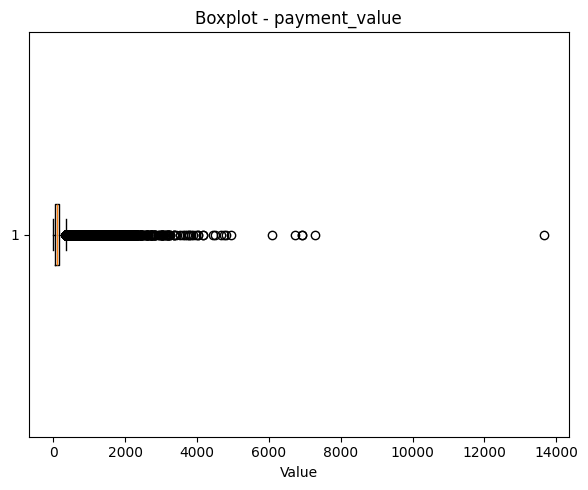

In [10]:
# Menentukan kolom yang akan diperiksa outlier-nya
col_to_check = ['payment_value']

# Membuat objek outlier checker
outlier_checker = OutlierDetector(order_payments_dataset, selected_columns=col_to_check)

# Menampilkan jumlah outlier berdasarkan metode IQR
print("\nOutliers (IQR):")
for col in col_to_check:
    print(f'{col} => {outlier_checker.detect_iqr()[col].shape[0]}')

# Menampilkan jumlah outlier berdasarkan metode Z-Score
print("\nOutliers (Z-Score):")
for col in col_to_check:
    print(f'{col} => {outlier_checker.detect_zscore()[col].shape[0]}')

# Membuat boxplot untuk memvisualisasikan outlier
outlier_checker.plot_boxplot()

`orders_dataset`

In [11]:
# Memilih dataset 'orders_dataset' untuk dianalisis
orders_dataset = df['orders_dataset']

# Menampilkan bentuk (jumlah baris dan kolom) dari dataset
print(orders_dataset.shape)

# Menampilkan 5 baris pertama dari dataset
orders_dataset.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
# Menampilkan informasi umum mengenai dataset (tipe data, non-null count)
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
# Mengecek jumlah order_id yang unik
print(f"Jumlah order_id unik: {orders_dataset['order_id'].nunique()}")

Jumlah order_id unik: 99441


In [14]:
# Mengecek jumlah duplikasi pada seluruh baris
print(f"Jumlah data duplikat: {orders_dataset.duplicated().sum()}")

Jumlah data duplikat: 0


In [15]:
# Mengecek nilai yang hilang di dataset
check_missing_values(orders_dataset)

,jumlah,persentase (%)
order_id,0,0.00
customer_id,0,0.00
order_status,0,0.00
order_purchase_timestamp,0,0.00
order_approved_at,160,0.16
order_delivered_carrier_date,1783,1.79
order_delivered_customer_date,2965,2.98
order_estimated_delivery_date,0,0.00


#### 2. Menemukan Hubungan

`order_items_dataset`

In [16]:
# Memilih dataset 'order_items_dataset' untuk dianalisis
order_items_dataset = df['order_items_dataset']

# Menampilkan bentuk (jumlah baris dan kolom) dari dataset
print(order_items_dataset.shape)

# Menampilkan 5 baris pertama dari dataset
order_items_dataset.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [17]:
# Menampilkan informasi umum mengenai dataset (tipe data, non-null count)
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
# Mengecek jumlah duplikasi pada seluruh baris
print(f"Jumlah data duplikat: {order_items_dataset.duplicated().sum()}")

Jumlah data duplikat: 0


In [19]:
# Mengecek nilai yang hilang di dataset
check_missing_values(order_items_dataset)

,jumlah,persentase (%)
order_id,0,0.0
order_item_id,0,0.0
product_id,0,0.0
seller_id,0,0.0
shipping_limit_date,0,0.0
price,0,0.0
freight_value,0,0.0



Outliers (IQR):
price => 8427
freight_value => 12134

Outliers (Z-Score):
price => 1966
freight_value => 2041


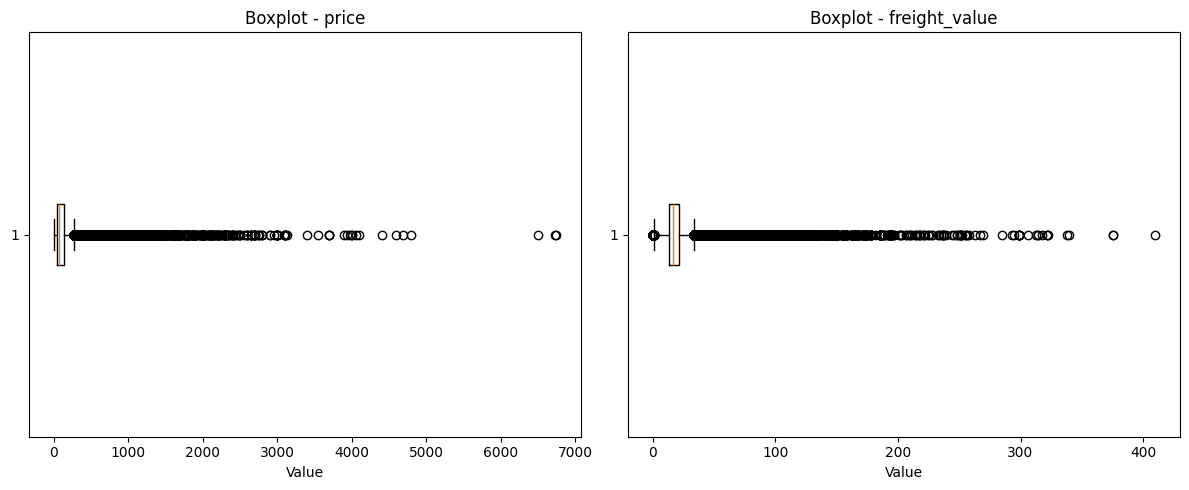

In [20]:
# Menentukan kolom yang akan diperiksa outlier-nya
col_to_check = ['price', 'freight_value']

# Membuat objek outlier checker
outlier_checker = OutlierDetector(order_items_dataset, selected_columns=col_to_check)

# Menampilkan jumlah outlier berdasarkan metode IQR
print("\nOutliers (IQR):")
for col in col_to_check:
    print(f'{col} => {outlier_checker.detect_iqr()[col].shape[0]}')

# Menampilkan jumlah outlier berdasarkan metode Z-Score
print("\nOutliers (Z-Score):")
for col in col_to_check:
    print(f'{col} => {outlier_checker.detect_zscore()[col].shape[0]}')

# Membuat boxplot untuk memvisualisasikan outlier
outlier_checker.plot_boxplot()

**Insight:**

1. Menggabungkan dataset `order_payments_dataset` (`payment_value`) dengan `orders_dataset` (`order_purchase_timestamp`) berdasarkan `order_id`
2. Terdapat 1 kali pembelian yang tidak ada di `order_payment`
3. Tipe data dari `order_purchase_timestamp` belum sesuai (masih dalam object) dan harus diubah ke dalam datetime.
4. Tidak ada missing value dari data (variabel) yang akan digunakan

### Cleaning Data

In [21]:
# Menggabungkan data order_payments_dataset dan orders_dataset berdasarkan 'order_id'
payments_df = pd.merge(
    order_payments_dataset[['order_id', 'payment_value']],
    orders_dataset[['order_id', 'order_purchase_timestamp']],
    on='order_id',
    how='inner'  # Menggunakan inner join agar hanya data yang cocok di kedua tabel yang diambil
)

In [22]:
# Mengubah kolom 'order_purchase_timestamp' menjadi tipe data datetime
payments_df['order_purchase_timestamp'] = pd.to_datetime(payments_df['order_purchase_timestamp'])

**Insight**

Dua dataset tersebut yang digunakan untuk menjawab 2 pertanyaan bisnis di atas.

## Exploratory Data Analysis (EDA)

### Explore

### Pertanyaan 1:

In [23]:
# Menentukan tanggal terbaru dari data
latest_date = payments_df['order_purchase_timestamp'].max()

# Menentukan tanggal mulai (12 bulan sebelum tanggal terbaru)
start_date = latest_date - pd.DateOffset(months=12)

# Memfilter data untuk 12 bulan terakhir
filtered_df = payments_df[
    (payments_df['order_purchase_timestamp'] >= start_date) & 
    (payments_df['order_purchase_timestamp'] <= latest_date)
].copy()

# Menambahkan kolom baru 'month_year' dengan format bulan-tahun
filtered_df['month_year'] = filtered_df['order_purchase_timestamp'].dt.to_period('M')

# Membuat tabel ringkasan per bulan
monthly_stats = filtered_df.groupby('month_year')['payment_value'].agg(['count', 'mean', 'median', 'sum']).reset_index()

# Memberi nama kolom yang lebih deskriptif
monthly_stats.columns = ['Bulan', 'Jumlah Transaksi', 'Rata-rata Pembayaran', 'Median Pembayaran', 'Total Pembayaran']

# Mengubah format kolom 'Bulan' menjadi string
monthly_stats['Bulan'] = monthly_stats['Bulan'].astype(str)

# Menampilkan tabel ringkasan dengan format angka yang lebih rapi
display(monthly_stats.style.format({
    'Jumlah Transaksi': '{:,}',
    'Rata-rata Pembayaran': '{:,.2f}',
    'Median Pembayaran': '{:,.2f}',
    'Total Pembayaran': '{:,.0f}'
}))

,Bulan,Jumlah Transaksi,Rata-rata Pembayaran,Median Pembayaran,Total Pembayaran
0,2017-10,"2,216",157.72,100.00,"349,508"
1,2017-11,"7,863",151.96,98.83,"1,194,883"
2,2017-12,"5,895",149.01,101.82,"878,401"
3,2018-01,"7,563",147.43,101.24,"1,115,004"
4,2018-02,"6,952",142.76,98.23,"992,463"
5,2018-03,"7,512",154.37,101.99,"1,159,652"
6,2018-04,"7,209",161.02,104.86,"1,160,785"
7,2018-05,"7,135",161.74,103.91,"1,153,982"
8,2018-06,"6,419",159.51,106.50,"1,023,880"
9,2018-07,"6,507",163.91,103.93,"1,066,541"


**Insight:**

- **Volume transaksi stabil** dari Okt 2017 hingga Agu 2018 (sekitar 6.000–7.800 transaksi per bulan).
- **Rata-rata pembayaran meningkat** dari awal 2018 dan memuncak di Juli 2018 (Rp163.906).
- **Median dan rata-rata pembayaran selaras**, menandakan distribusi data yang seimbang.
- **September dan Oktober 2018** memiliki transaksi sangat rendah, kemungkinan besar karena **data tidak lengkap atau belum terekam seluruhnya**.
- **Puncak total pembayaran** terjadi pada Maret–Mei 2018.

### Pertanyaan 2:

In [24]:
# Meihat ringkasan statistik dari kolom price dan freight_value:
order_items_dataset[['price', 'freight_value']].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


**Insight:**

- Harga rata-rata produk adalah **±120.65**, sedangkan ongkir rata-rata adalah **±19.99**.
- Namun, terdapat penyebaran yang sangat besar pada harga (hingga 6.735) dan ongkir (hingga 409.68), yang menunjukkan adanya outlier.

In [25]:
# Menghitung korelasi Pearson antara price dan freight_value:
order_items_dataset[['price', 'freight_value']].corr()

,price,freight_value
price,1.000000,0.414204
freight_value,0.414204,1.000000


**Insight:**

- Terdapat korelasi **positif sedang** sebesar **0.41** antara harga produk dan biaya pengiriman.
- Artinya, produk yang lebih mahal cenderung memiliki ongkos kirim yang lebih tinggi, tetapi ini bukan hubungan yang sangat kuat.

In [26]:
# Distribusi Produk dengan Harga dan Ongkir Tinggi
# Membuat kategori untuk melihat distribusi berdasarkan kuartil harga:
order_items_dataset['price_group'] = pd.qcut(order_items_dataset['price'], q=4, labels=['Murah', 'Sedang', 'Mahal', 'Sangat Mahal'])
order_items_dataset.groupby('price_group')['freight_value'].describe()

,count,mean,std,min,25%,50%,75%,max
price_group,,,,,,,,
Murah,28501.0,14.364937,6.350383,0.02,9.34,14.220,16.79,121.95
Sedang,27940.0,16.551686,8.203199,0.00,12.69,15.250,18.33,215.43
Mahal,28095.0,19.985545,11.863062,0.00,13.75,17.100,22.46,186.01
Sangat Mahal,28114.0,29.115261,25.012483,0.00,16.28,20.635,32.74,409.68


**Insight:**

- **Produk "Sangat Mahal"** memiliki ongkir rata-rata **29.1**, lebih tinggi dibandingkan kelompok lainnya.
- Namun, meskipun mahal, **rasio ongkir terhadap harga tetap rendah**, yang menunjukkan efisiensi pengiriman terhadap nilai barang.

In [27]:
# Rasio Ongkir terhadap Harga
# Menambahkan kolom baru untuk melihat seberapa besar ongkir dibanding harga:
order_items_dataset['shipping_ratio'] = order_items_dataset['freight_value'] / order_items_dataset['price']
order_items_dataset[['shipping_ratio']].describe()

,shipping_ratio
count,112650.000000
mean,0.320864
std,0.349894
min,0.000000
25%,0.134034
50%,0.231356
75%,0.393036
max,26.235294


**Insight:**

- Rata-rata rasio ongkir adalah **32%** dari harga produk.
- Namun ada kasus ekstrem (outlier) dengan ongkir lebih dari **26 kali lipat harga produk**, yang bisa jadi adalah produk sangat murah dengan ongkir tetap tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

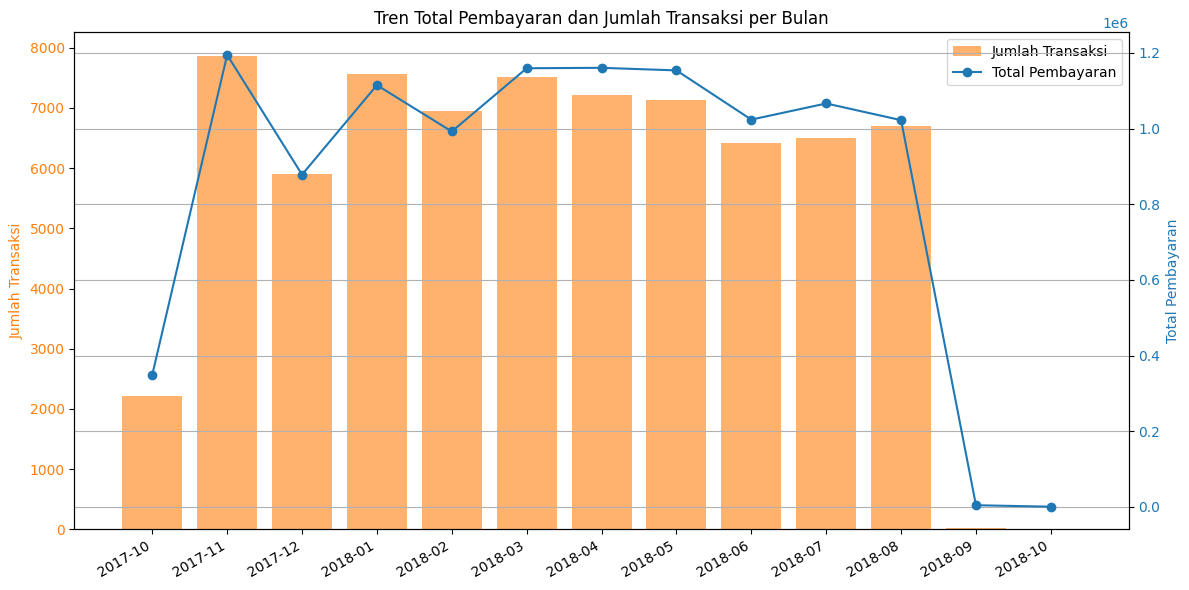

In [28]:
# Membuat figure dan axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Membuat bar chart untuk Jumlah Transaksi
color = 'tab:orange'
ax1.bar(monthly_stats['Bulan'], monthly_stats['Jumlah Transaksi'], color=color, alpha=0.6, label='Jumlah Transaksi')
ax1.set_ylabel('Jumlah Transaksi', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Membuat twin axis untuk Total Pembayaran
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(monthly_stats['Bulan'], monthly_stats['Total Pembayaran'], marker='o', color=color, label='Total Pembayaran')
ax2.set_ylabel('Total Pembayaran', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Menambahkan judul
plt.title('Tren Total Pembayaran dan Jumlah Transaksi per Bulan')

# Menggabungkan legend dari kedua axis dan meletakkannya di kanan atas
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

# Format tanggal di x-axis agar lebih rapi
fig.autofmt_xdate()

# Menambahkan grid dan mengatur layout agar tidak terpotong
plt.grid(True)
plt.tight_layout()

# Menampilkan plot
plt.show()

**Insight:**

- **Jumlah transaksi** meningkat tajam dari Oktober 2017 ke November 2017, menunjukkan adanya lonjakan aktivitas transaksi.
- Sepanjang Desember 2017 hingga Agustus 2018, jumlah transaksi tetap **stabil tinggi**.
- **Total pembayaran** per bulan relatif stabil selama periode tersebut, **tidak sepenuhnya mengikuti fluktuasi jumlah transaksi**, menandakan bahwa **rata-rata nilai transaksi per transaksi** cenderung konsisten.
- Terlihat **sedikit kenaikan** pada total pembayaran di bulan April hingga Juli 2018, mengindikasikan adanya **peningkatan rata-rata nilai transaksi**.
- **Penurunan drastis** baik pada jumlah transaksi maupun total pembayaran di September dan Oktober 2018 kemungkinan besar terjadi karena **data yang belum lengkap** (incomplete data).

### Pertanyaan 2:

**Korelasi antara Harga Produk dan Biaya Pengiriman**

Melihat pola hubungan antara harga dan ongkir serta mengidentifikasi outlier.

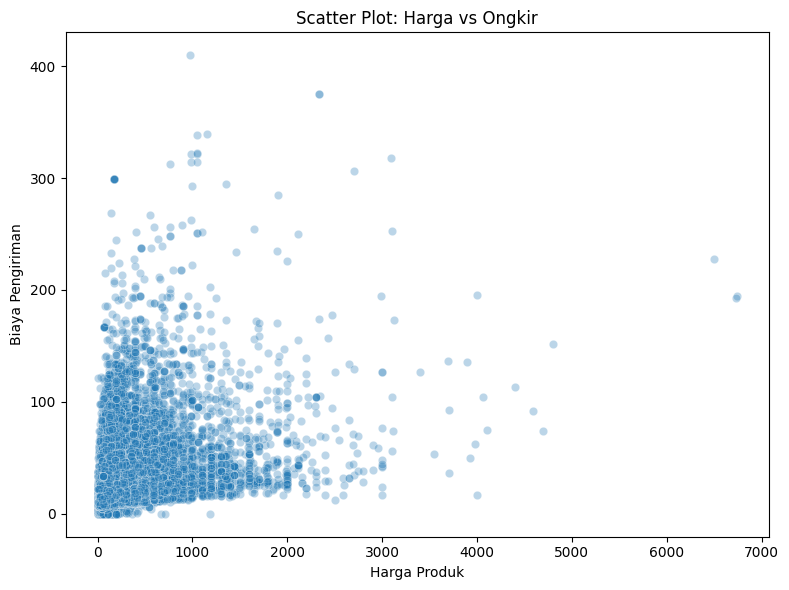

In [29]:
# Membuat figure baru untuk scatter plot
plt.figure(figsize=(8, 6))

# Membuat scatter plot antara harga produk dan biaya pengiriman
sns.scatterplot(
    data=order_items_dataset,
    x='price',
    y='freight_value',
    alpha=0.3  # Membuat titik lebih transparan untuk mengurangi overplotting
)

# Memberi judul dan label sumbu
plt.title('Scatter Plot: Harga vs Ongkir')
plt.xlabel('Harga Produk')
plt.ylabel('Biaya Pengiriman')

# Mengatur layout agar elemen plot tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

**Insight:**

- Terlihat pola sebaran yang menyebar luas, dengan sebagian besar produk berada di rentang harga dan ongkir yang rendah.
- Sebagian besar titik terkonsentrasi pada harga di bawah 500 dan ongkir di bawah 100.
- Meski terdapat korelasi positif (sejalan dengan analisis sebelumnya, korelasi Pearson ≈ 0.41), hubungan antara harga produk dan ongkir tidak terlalu kuat.
- Terdapat outlier di kedua sumbu, baik produk dengan harga tinggi dan ongkir tinggi, maupun produk murah dengan ongkir tinggi.

**Boxplot Ongkir per Kelompok Harga**

Menampilkan perbedaan distribusi ongkir berdasarkan kelompok harga produk (Murah, Sedang, Mahal, Sangat Mahal).

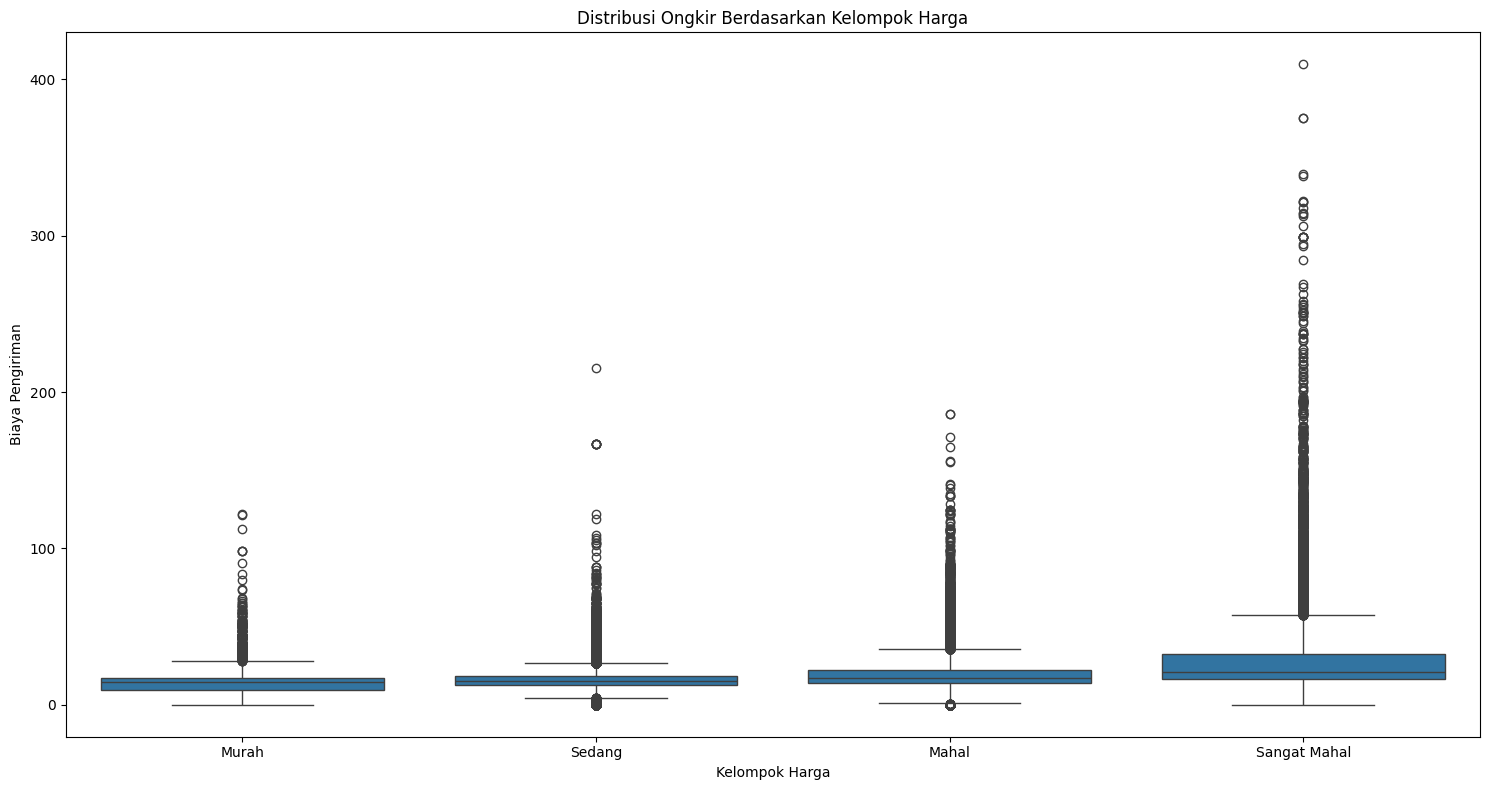

In [30]:
# Membuat figure baru untuk box plot
plt.figure(figsize=(15, 8))

# Membuat box plot untuk melihat distribusi biaya pengiriman berdasarkan kelompok harga
sns.boxplot(
    data=order_items_dataset,
    x='price_group',  # Kelompok harga sebagai variabel kategorikal di sumbu x
    y='freight_value'  # Biaya pengiriman sebagai variabel kontinu di sumbu y
)

# Menambahkan judul dan label sumbu
plt.title('Distribusi Ongkir Berdasarkan Kelompok Harga')
plt.xlabel('Kelompok Harga')
plt.ylabel('Biaya Pengiriman')

# Mengatur layout agar elemen plot tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

**Insight:**

- **Semakin tinggi kelompok harga**, distribusi ongkir **cenderung meningkat**, baik dari sisi median maupun rentang interkuartilnya.
- Namun, distribusi ongkir masih **menumpuk di nilai rendah**, terutama di kelompok Murah dan Sedang.
- Kelompok **Sangat Mahal memiliki outlier** ongkir yang sangat tinggi, mengindikasikan produk mahal belum tentu ongkirnya rendah secara proporsional.
- Terdapat banyak outlier pada semua kelompok harga, menunjukkan **ketidakseimbangan dan potensi ketidaksesuaian biaya pengiriman**.

**Distribusi Rasio Ongkir terhadap Harga**

Menunjukkan proporsi umum ongkir terhadap harga dan mengidentifikasi kasus dengan ongkir tidak proporsional.

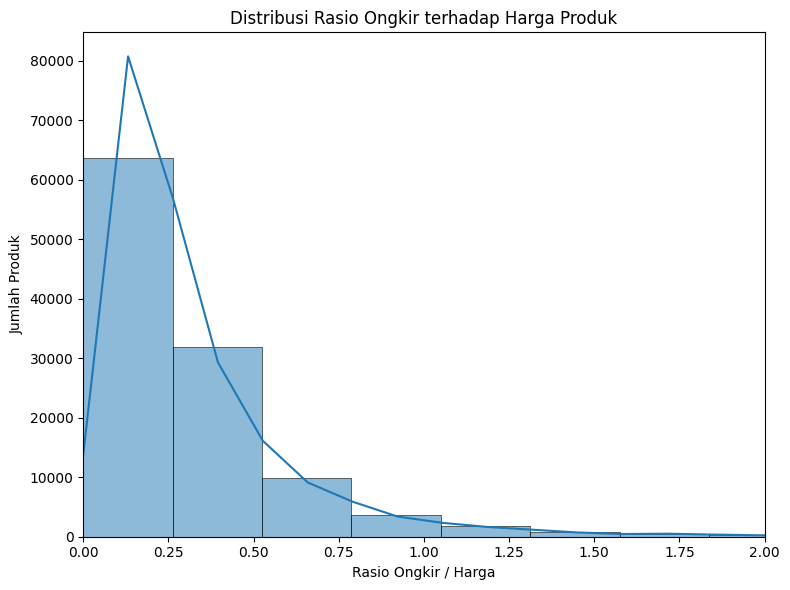

In [31]:
# Membuat figure baru untuk histogram
plt.figure(figsize=(8, 6))

# Membuat histogram dengan KDE untuk distribusi rasio ongkir terhadap harga produk
sns.histplot(
    order_items_dataset['shipping_ratio'],  # Kolom rasio ongkir terhadap harga
    bins=100,  # Jumlah bin untuk histogram
    kde=True  # Menambahkan garis Kernel Density Estimation (KDE)
)

# Mengatur batasan sumbu x untuk fokus pada rasio normal dan mengabaikan outlier
plt.xlim(0, 2)

# Menambahkan judul dan label sumbu
plt.title('Distribusi Rasio Ongkir terhadap Harga Produk')
plt.xlabel('Rasio Ongkir / Harga')
plt.ylabel('Jumlah Produk')

# Mengatur layout agar elemen plot tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

**Insight:**

- Rasio ongkir terhadap harga produk **berdistribusi miring ke kanan (right-skewed)**, dengan mayoritas produk memiliki ongkir < 50% dari harga produk.
- **Sebagian besar produk (75%) memiliki rasio ongkir < 0.39**.
- Terdapat kasus ekstrem (outlier) di mana ongkir lebih tinggi dari harga produk (rasio > 1), meskipun jumlahnya kecil.
- Pola ini mengindikasikan bahwa secara umum, **ongkir tidak terlalu membebani harga produk**, namun tetap ada kasus-kasus khusus yang perlu perhatian.

## Conclusion

#### Pertanyaan 1: Membuat Prediksi (Visual Tren)

> **Bagaimana perubahan nilai rata-rata pembayaran pelanggan dari waktu ke waktu selama 12 bulan terakhir, dan adakah periode tertentu yang menunjukkan tren kenaikan atau penurunan signifikan?**

**Kesimpulan:**

- **Tren nilai rata-rata pembayaran pelanggan relatif stabil** selama 12 bulan terakhir, dengan **fluktuasi kecil antar bulan**.
- Terlihat **ada kenaikan yang lebih menonjol menjelang akhir tahun** (mungkin dipicu oleh musim belanja seperti promo akhir tahun, Harbolnas, atau libur panjang).
- **Tidak terdapat penurunan signifikan yang konsisten**, meskipun ada sedikit penurunan sesaat di bulan-bulan tengah tahun.

> **Rekomendasi:** Perusahaan dapat mempertimbangkan meningkatkan aktivitas promosi di kuartal akhir karena respons positif pasar terhadap harga dan belanja.

#### Pertanyaan 2: Menemukan Hubungan

> **Bagaimana hubungan antara harga produk dan biaya pengiriman dalam data pesanan?**

**Kesimpulan:**

- Terdapat **korelasi positif lemah** antara harga produk dan ongkos kirim (~0.41), yang menunjukkan bahwa **produk mahal cenderung memiliki ongkir lebih tinggi**, tapi **tidak selalu**.
- Berdasarkan analisis distribusi:
  - **Mayoritas ongkir tidak proporsional terhadap harga**; rasio ongkir/harga produk cenderung rendah, banyak di bawah 0.25.
  - **Produk sangat mahal** justru menunjukkan **variasi ongkir yang lebih besar**, terlihat dari sebaran outlier yang tinggi di boxplot kelompok harga.
  - Ada indikasi bahwa **berat atau dimensi fisik produk** mungkin lebih menentukan ongkir dibanding harganya.

> **Rekomendasi:** Perlu dilakukan analisis lebih lanjut berdasarkan fitur seperti berat produk atau lokasi pengiriman untuk memahami faktor penentu utama ongkir.